<a href="https://colab.research.google.com/github/AndreMoreira00/BTC_AI/blob/main/BTC_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

## Instalação da biblioteca e importação da base de dados

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [4]:
! pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 k

In [6]:
from prophet import Prophet
import pandas as pd

In [51]:
dataset = pd.read_csv('/content/BTC-USD-D.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3609,2024-08-04,60676.093750,61062.988281,57210.804688,58116.976563,58116.976563,31758917219
3610,2024-08-05,58110.296875,58268.828125,49121.238281,53991.457031,53991.457031,108991085584
3611,2024-08-06,53991.347656,57059.917969,53973.273438,56034.316406,56034.316406,49300484106
3612,2024-08-07,56040.632813,57726.882813,54620.507813,55027.460938,55027.460938,41637562185


In [52]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3.614000e+03
mean,17347.835961,17743.099023,16923.945907,17362.994639,17362.994639,1.749113e+10
std,19232.285710,19664.552659,18753.748099,19241.019537,19241.019537,1.922302e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1105.912476,1127.815003,1075.819977,1115.655029,1115.655029,2.708015e+08
50%,8962.529785,9205.565430,8796.501465,8991.542481,8991.542481,1.364765e+10
75%,28403.526856,28891.608398,27883.912598,28414.569824,28414.569824,2.819884e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


In [53]:
dataset.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3609,2024-08-04,58116.976563
3610,2024-08-05,53991.457031
3611,2024-08-06,56034.316406
3612,2024-08-07,55027.460938


In [54]:
dataset = dataset[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
dataset

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3609,2024-08-04,58116.976563
3610,2024-08-05,53991.457031
3611,2024-08-06,56034.316406
3612,2024-08-07,55027.460938


In [55]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3609,2024-08-04,58116.976563
3610,2024-08-05,53991.457031
3611,2024-08-06,56034.316406
3612,2024-08-07,55027.460938


## Construção do modelo e previsões

In [56]:
model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi3p3jzeb/p6x05fca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi3p3jzeb/2bvas6e0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56694', 'data', 'file=/tmp/tmpi3p3jzeb/p6x05fca.json', 'init=/tmp/tmpi3p3jzeb/2bvas6e0.json', 'output', 'file=/tmp/tmpi3p3jzeb/prophet_model6i3ud_xy/prophet_model-20240808204543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:45:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
future = model.make_future_dataframe(periods=120)
forecast = model.predict(future)

In [58]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,163.970871,-8926.461361,4325.183009,163.970871,163.970871,-2172.488734,-2172.488734,-2172.488734,34.109500,34.109500,34.109500,-2206.598234,-2206.598234,-2206.598234,0.0,0.0,0.0,-2008.517863
1,2014-09-18,164.441021,-8266.512385,4053.286850,164.441021,164.441021,-2263.345213,-2263.345213,-2263.345213,-19.444136,-19.444136,-19.444136,-2243.901078,-2243.901078,-2243.901078,0.0,0.0,0.0,-2098.904192
2,2014-09-19,164.911171,-8221.617444,4714.349362,164.911171,164.911171,-2301.013455,-2301.013455,-2301.013455,-22.126508,-22.126508,-22.126508,-2278.886947,-2278.886947,-2278.886947,0.0,0.0,0.0,-2136.102285
3,2014-09-20,165.381320,-8727.614543,4274.798803,165.381320,165.381320,-2327.235638,-2327.235638,-2327.235638,-15.950276,-15.950276,-15.950276,-2311.285363,-2311.285363,-2311.285363,0.0,0.0,0.0,-2161.854318
4,2014-09-21,165.851470,-8886.891509,4218.637360,165.851470,165.851470,-2348.691263,-2348.691263,-2348.691263,-7.910508,-7.910508,-7.910508,-2340.780755,-2340.780755,-2340.780755,0.0,0.0,0.0,-2182.839793


In [59]:
len(dataset), len(forecast)

(3614, 3734)

In [60]:
len(forecast) - len(dataset)

120

In [61]:
forecast.tail(120)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3614,2024-08-09,61171.470107,53547.653095,67547.270779,61171.470107,61171.470107,-637.061389,-637.061389,-637.061389,-22.126508,-22.126508,-22.126508,-614.934881,-614.934881,-614.934881,0.0,0.0,0.0,60534.408719
3615,2024-08-10,61236.982025,54050.068705,66842.573991,61236.982025,61236.982025,-629.967943,-629.967943,-629.967943,-15.950276,-15.950276,-15.950276,-614.017668,-614.017668,-614.017668,0.0,0.0,0.0,60607.014082
3616,2024-08-11,61302.493943,54408.943323,67023.082944,61302.493943,61302.493943,-624.679710,-624.679710,-624.679710,-7.910508,-7.910508,-7.910508,-616.769202,-616.769202,-616.769202,0.0,0.0,0.0,60677.814233
3617,2024-08-12,61368.005860,54181.193031,67492.651696,61368.005860,61368.005860,-582.123115,-582.123115,-582.123115,41.136403,41.136403,41.136403,-623.259518,-623.259518,-623.259518,0.0,0.0,0.0,60785.882745
3618,2024-08-13,61433.517778,54751.566504,67381.038892,61433.517778,61433.517778,-643.360910,-643.360910,-643.360910,-9.814476,-9.814476,-9.814476,-633.546433,-633.546433,-633.546433,0.0,0.0,0.0,60790.156868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,2024-12-02,68705.340642,60920.484285,75219.977379,66778.373757,70565.341970,-983.517035,-983.517035,-983.517035,41.136403,41.136403,41.136403,-1024.653438,-1024.653438,-1024.653438,0.0,0.0,0.0,67721.823607
3730,2024-12-03,68770.852560,60642.146184,74782.045091,66821.467917,70671.369335,-1046.136549,-1046.136549,-1046.136549,-9.814476,-9.814476,-9.814476,-1036.322073,-1036.322073,-1036.322073,0.0,0.0,0.0,67724.716011
3731,2024-12-04,68836.364477,60611.344191,75124.109912,66842.421303,70772.112113,-1013.958783,-1013.958783,-1013.958783,34.109500,34.109500,34.109500,-1048.068283,-1048.068283,-1048.068283,0.0,0.0,0.0,67822.405694
3732,2024-12-05,68901.876395,60368.645093,74619.737115,66861.045518,70870.967891,-1079.196040,-1079.196040,-1079.196040,-19.444136,-19.444136,-19.444136,-1059.751905,-1059.751905,-1059.751905,0.0,0.0,0.0,67822.680355


## Gráfico das previsões

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



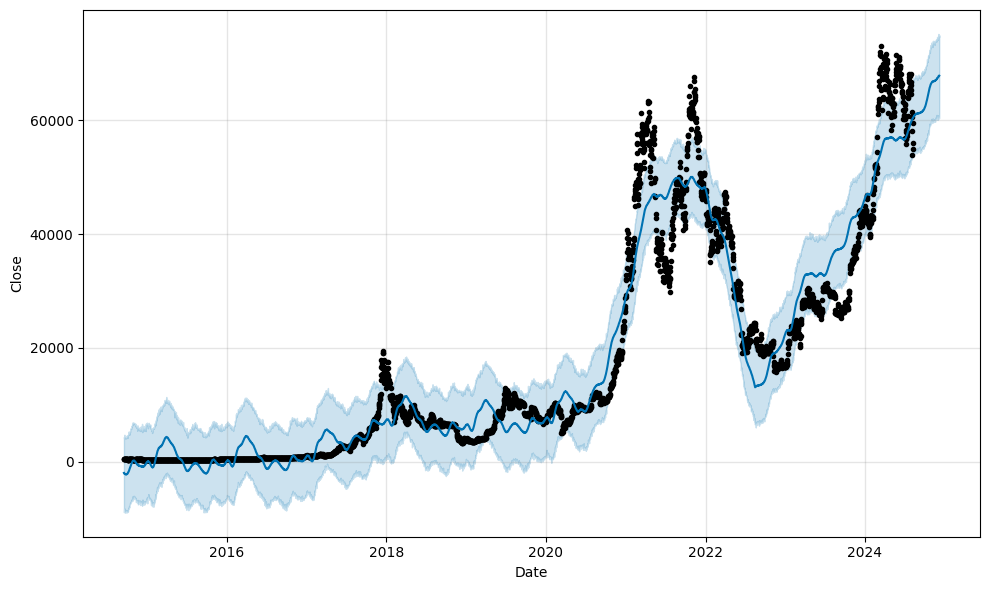

In [62]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Close');

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



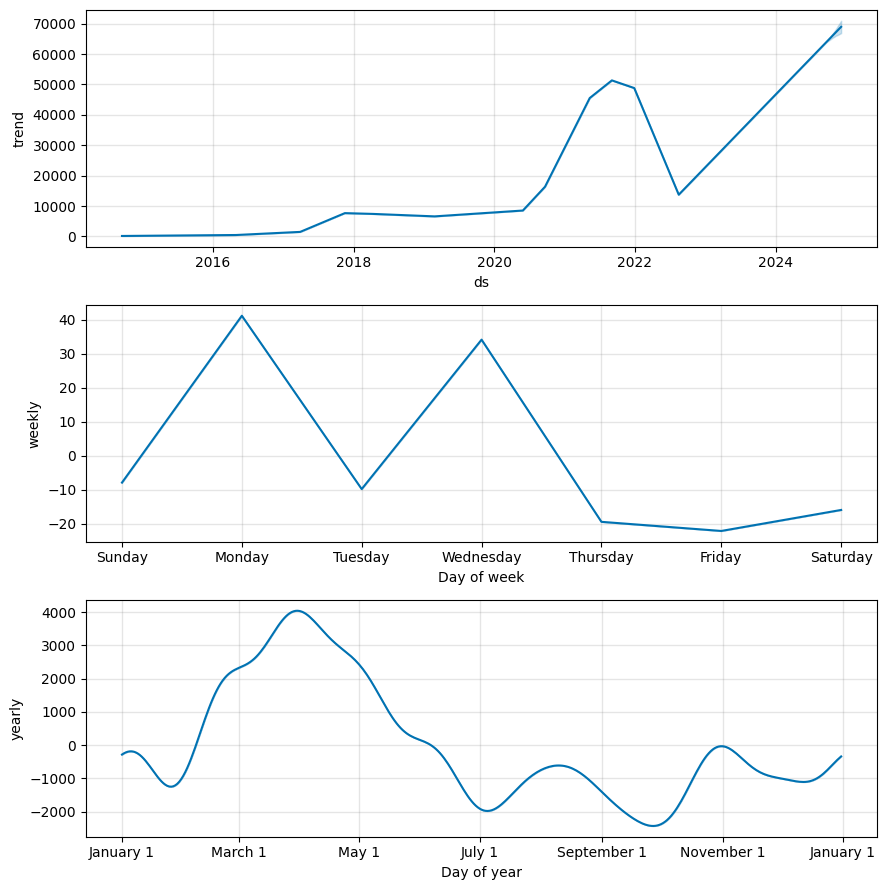

In [63]:
model.plot_components(forecast);

In [64]:
from prophet.plot import plot_plotly, plot_components_plotly

In [67]:
plot_plotly(model, forecast)

In [66]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

